```
Nama : Mochamad Rizky Darmawan
Asal: Bandung
Email: mochamad.rizky.darmawan@gmail.com
```


In [12]:
import os
import time
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /content/rockpaperscissors.zip

In [7]:
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [27]:
datagen = image.ImageDataGenerator(
  zoom_range=0.2,
  brightness_range=(0.5, 1.5),
  width_shift_range=0.2,
  vertical_flip=True,
  horizontal_flip=True,
  shear_range=0.2,
  validation_split= 0.4
)

base_dir = 'rockpaperscissors'

train_generator = datagen.flow_from_directory(
  base_dir,
  subset="training",
  target_size=(100, 150),)

validation_generator = datagen.flow_from_directory(
  base_dir,
  subset="validation",
  target_size=(100, 150),)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.
{'paper': 0, 'rock': 1, 'scissors': 2}


In [28]:
now = time.time()

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(100, 150, 3)),
  layers.Conv2D(16, (3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, (3,3), activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(3, activation='softmax')
])

model.compile(loss=CategoricalCrossentropy(),
  optimizer= Adam(),
  metrics=['accuracy']
)

history = model.fit(
  train_generator,
  validation_data=validation_generator,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator),
  epochs=20,
  verbose=2
)

dur = (time.time() - now) / 60
print(round(dur), "minutes")

Epoch 1/20
42/42 - 33s - loss: 0.9915 - accuracy: 0.4749 - val_loss: 0.6386 - val_accuracy: 0.7746
Epoch 2/20
42/42 - 32s - loss: 0.4759 - accuracy: 0.8219 - val_loss: 0.5192 - val_accuracy: 0.8421
Epoch 3/20
42/42 - 32s - loss: 0.3570 - accuracy: 0.8630 - val_loss: 0.3228 - val_accuracy: 0.8879
Epoch 4/20
42/42 - 32s - loss: 0.2984 - accuracy: 0.8866 - val_loss: 0.2874 - val_accuracy: 0.8902
Epoch 5/20
42/42 - 33s - loss: 0.2390 - accuracy: 0.9178 - val_loss: 0.2255 - val_accuracy: 0.9336
Epoch 6/20
42/42 - 32s - loss: 0.1761 - accuracy: 0.9399 - val_loss: 0.1667 - val_accuracy: 0.9508
Epoch 7/20
42/42 - 32s - loss: 0.1638 - accuracy: 0.9437 - val_loss: 0.1186 - val_accuracy: 0.9634
Epoch 8/20
42/42 - 32s - loss: 0.1242 - accuracy: 0.9589 - val_loss: 0.0995 - val_accuracy: 0.9668
Epoch 9/20
42/42 - 32s - loss: 0.0818 - accuracy: 0.9726 - val_loss: 0.1527 - val_accuracy: 0.9577
Epoch 10/20
42/42 - 32s - loss: 0.1055 - accuracy: 0.9680 - val_loss: 0.1008 - val_accuracy: 0.9680
Epoch 11/

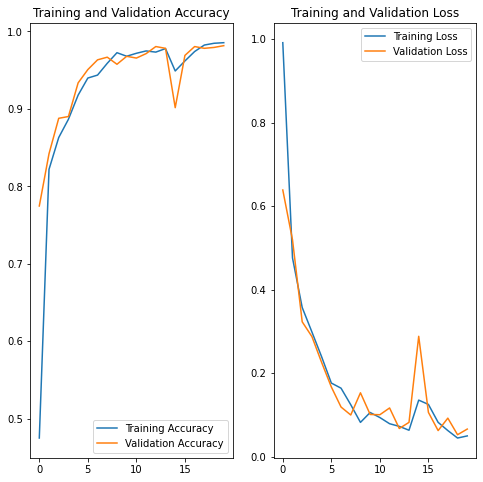

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [31]:
class_names = ["paper", "rock", "scissors"]

Saving 1Frbe8cdOdkciOBg.png to 1Frbe8cdOdkciOBg (1).png
1Frbe8cdOdkciOBg.png
paper


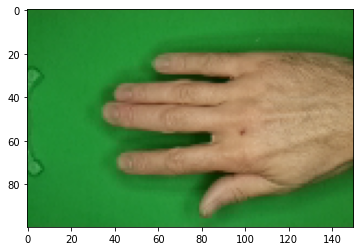

In [32]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  prediction = model.predict(images)
  
  print(fn)
  print(class_names[np.argmax(prediction[0])])